In [521]:
import pandas as pd
import matplotlib.pyplot as plt

In [522]:
# !pip install pandas xlrd openpyxl

In [534]:
path = "CAPE.xlsx"
df = pd.read_excel(path,sheet_name=0)


In [535]:
df = df.dropna(subset=['CAPE'])
df.reset_index(drop=True, inplace=True)



# df['Date'] = df['Date'].astype(str)
# df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m')
# # sort by date
# df = df.sort_values(by='Date')
df.head(10)

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Earnings,CAPE,TR CAPE
0,1881.01,6.19,0.265,0.4858,9.419420,1881.041667,3.700000,207.242891,8.872272,383.409300,16.264717,30.090507,18.473952,24.135057
1,1881.02,6.17,0.270,0.4817,9.514585,1881.125000,3.693333,204.507131,8.949259,379.727725,15.966140,29.645842,18.147258,23.655503
2,1881.03,6.24,0.275,0.4775,9.514585,1881.208333,3.686667,206.827309,9.114986,385.446207,15.826930,29.495283,18.270119,23.767713
3,1881.04,6.22,0.280,0.4733,9.609669,1881.291667,3.680000,204.124477,9.188883,381.836216,15.532494,29.055158,17.950108,23.308850
4,1881.05,6.50,0.285,0.4692,9.514585,1881.375000,3.673333,215.445114,9.446440,404.485199,15.551823,29.197609,18.869719,24.456686
5,1881.06,6.58,0.290,0.4650,9.514585,1881.458333,3.666667,218.096746,9.612167,410.967334,15.412612,29.042524,19.028711,24.616331
6,1881.07,6.35,0.295,0.4608,9.609669,1881.541667,3.660000,208.390744,9.681145,394.198185,15.122276,28.605752,18.116367,23.397455
7,1881.08,6.20,0.300,0.4567,9.800000,1881.625000,3.653333,199.516474,9.654023,378.933170,14.696641,27.912706,17.286244,22.294301
8,1881.09,6.25,0.305,0.4525,10.180580,1881.708333,3.646667,193.606814,9.448013,369.204553,14.017133,26.730410,16.724837,21.542784
9,1881.10,6.15,0.310,0.4483,10.275745,1881.791667,3.640000,188.744770,9.513964,361.444640,13.758420,26.347257,16.261989,20.927319


In [557]:
idx = 1078

def get_returns(idx):
    shares = 1  # Start with 1 share
    prev_price = df["P"].iloc[idx - 120]  # Price 10 years ago
    curr_price = df["P"].iloc[idx]  # Current price

    # Loop to account for reinvested dividends
    for i in range(120):
        div = (df["D"].iloc[idx - 120 + i] * shares) / 12 # Dividend per share * total shares
        shares += div / df["P"].iloc[idx - 120 + i]  # Reinvest dividend into more shares

    # Calculate annualized return
    ret = (((shares * curr_price) / prev_price) ** (1 / 10)) - 1
    return ret

# List to store returns
import math
nominal_returns = [math.nan] * 120

# Loop through valid indices
for i in range(120, len(df)):
    nominal_returns.append(get_returns(i))


df['Nominal Returns'] = nominal_returns

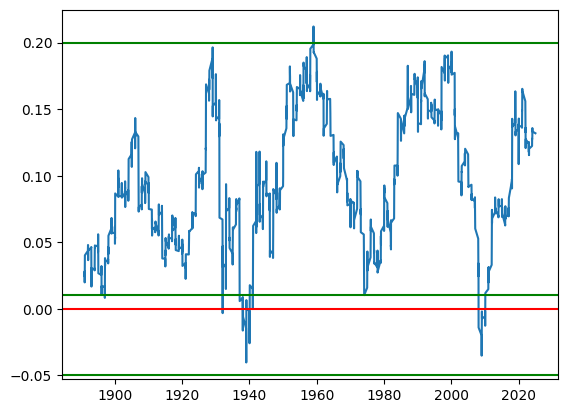

In [560]:
plt.plot(df['Date'], df['Nominal Returns'])
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=0.2, color='g', linestyle='-')
plt.axhline(y=-0.05, color='g', linestyle='-')
plt.axhline(y=0.01, color='g', linestyle='-')

In [526]:
from datetime import datetime
real_returns = []
dates = []
for i in range(120,len(df)):
    curr_real_price = df["Real Total Return Price"][i]
    # accumulated_dividends = df["D"][i-120:i].sum()
    accumulated_dividends = 0
    prev_real_price = df["Real Total Return Price"][i-120]

    real_annual_return = (( (curr_real_price + accumulated_dividends) / prev_real_price ) ** (1/10)) - 1
    # print(str(df["Date"][i]))
    # year = str(df["Date"][i])[:4]
    # month = str(df["Date"][i])[-2:]
    # print(year, month)

    real_returns.append(real_annual_return)
    # dates.append()


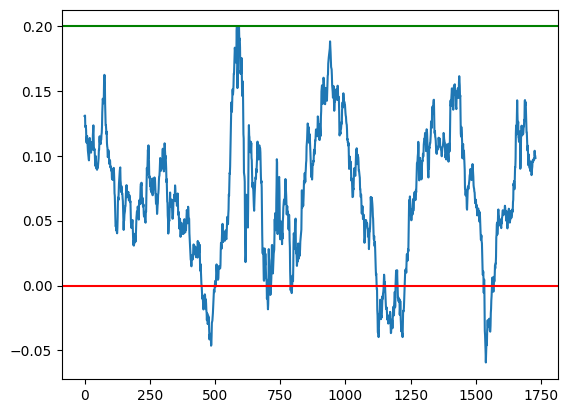

In [529]:
plt.plot(real_returns)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=0.2, color='g', linestyle='-')

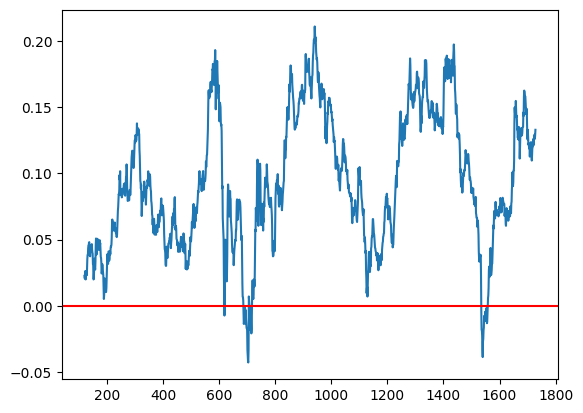

In [562]:
def get_returns(idx):
    
    R_t_1 = 0
    R_t = 0
    P_t_1 = 0
    P_t = 0

    # Loop to account for reinvested dividends
    for i in range(120):
        if i == 0:
            R_t  = df["P"].iloc[idx-120+i]
            P_t = df["P"].iloc[idx-120+i]
        else:
            P_t_1 = df["P"].iloc[idx-120+i-1]
            d_t_1 = df["D"].iloc[idx-120+i-1]
            R_t_1 = (R_t/P_t) * (P_t_1 + d_t_1/12)

            R_t = R_t_1
            P_t = P_t_1

        ret = (R_t / df["P"].iloc[idx-120]) ** (1/10) - 1    
        
    return ret

# List to store returns
import math
nominal_returns = [math.nan] * 120

# Loop through valid indices
for i in range(120, len(df)):
    nominal_returns.append(get_returns(i))

plt.plot(nominal_returns)
plt.axhline(y=0, color='r', linestyle='-')

In [538]:
1100-12+2-12

1078

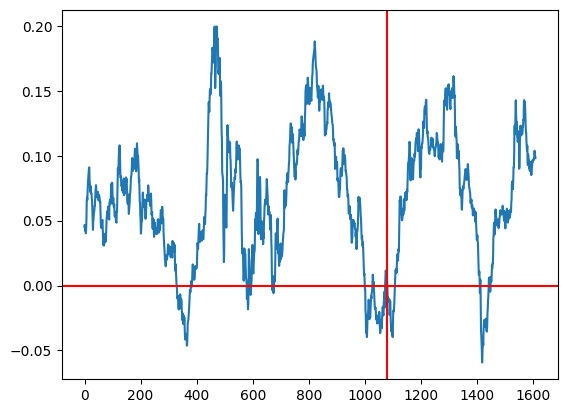

In [ ]:
plt.plot(real_returns)
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=1100-12+2-12, color='r', linestyle='-')

In [432]:

datetime(2020, 1, 1)

datetime.datetime(2020, 1, 1, 0, 0)

In [423]:
# months_to_skip = 12*10
# df['10yr_return'] = df['Real Price'].pct_change(months_to_skip)
# df['10yr_return'] = (1 + df['10yr_return'])**(1/10) - 1
# df['10yr_return'] = df['10yr_return'].shift(-months_to_skip)
# df['10yr_return'] = df['10yr_return']*100
# df = df.dropna(subset=['10yr_return'])

C:\Users\Ishit\AppData\Local\Temp\ipykernel_32224\186079140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['10yr_return'] = df['Real Price'].pct_change(months_to_skip)
C:\Users\Ishit\AppData\Local\Temp\ipykernel_32224\186079140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['10yr_return'] = (1 + df['10yr_return'])**(1/10) - 1
C:\Users\Ishit\AppData\Local\Temp\ipykernel_32224\186079140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

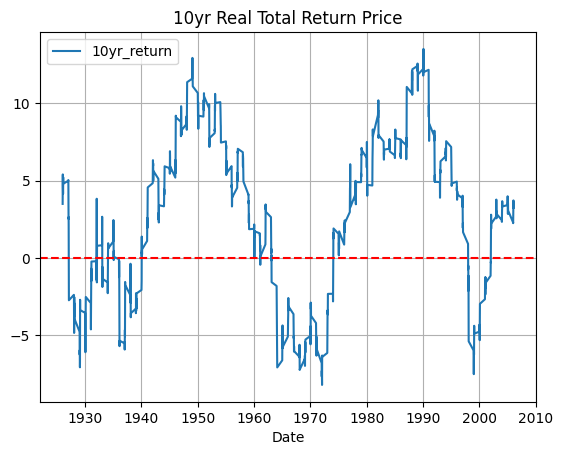

In [424]:
df.plot(x='Date', y='10yr_return', style='-', grid=True, title='10yr Real Total Return Price')
plt.axhline(y=0, color='r', linestyle='--')
# x axis limit
# plt.xlim(1970, 2020)

C:\Users\Ishit\AppData\Local\Temp\ipykernel_32224\1800709324.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(10, 20, 'y = ' + str(round(model.params[1], 2)) + 'x + ' + str(round(model.params[0], 2)))


Text(10, 10, 'R2: 0.24')

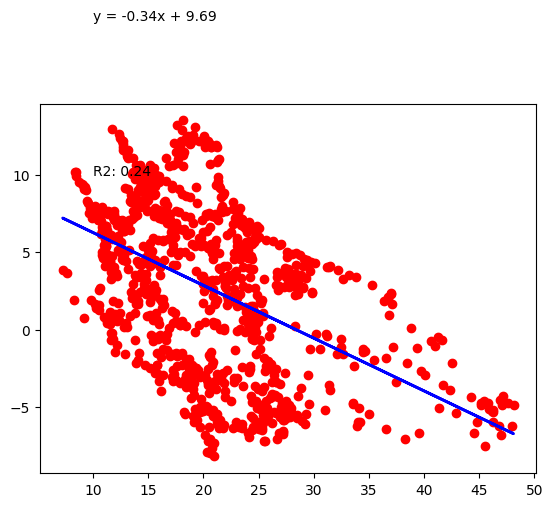

In [425]:
plt.scatter(df['TR CAPE'], df['10yr_return'], color='r')

# OLS estimation
import statsmodels.api as sm
X = df['TR CAPE']
y = df['10yr_return']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# print(model.summary())

# plot ols regression line
plt.plot(df['TR CAPE'], model.predict(X), color='blue', linewidth=2)
# print equation
plt.text(10, 20, 'y = ' + str(round(model.params[1], 2)) + 'x + ' + str(round(model.params[0], 2)))
# print R2
plt.text(10, 10, 'R2: ' + str(round(model.rsquared, 2)))

In [371]:
# idx = 0
# print(df.iloc[idx]['Date'], df.iloc[idx + 120]['Date'])

# ret = (df.iloc[idx + 120]['Real Total Return Price'] / df.iloc[idx]['Real Total Return Price'])**(1/10) - 1
# print(ret == df.iloc[idx+120]['10yr_return'])

1881.01 1891.01
True


In [421]:
df['Date'][1630-11]

2015.12

In [422]:
df = df.iloc[540:1629]

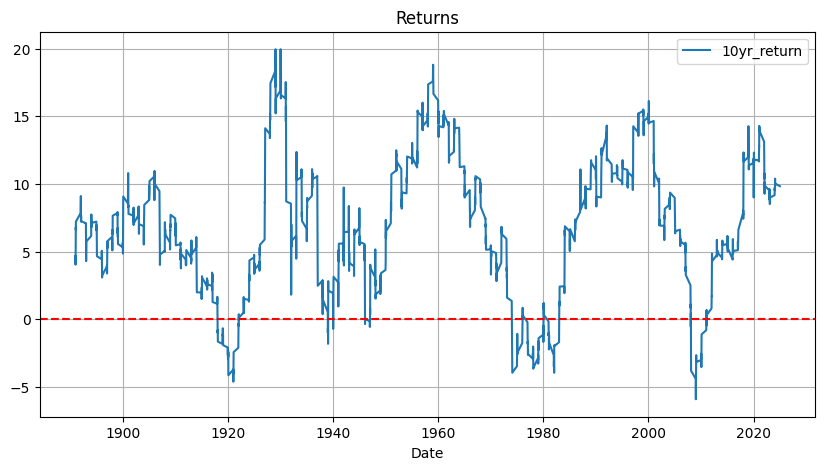

In [379]:
df.plot(x='Date', y='10yr_return', title='Returns', figsize=(10,5), grid=True, style='-')
plt.axhline(y=0, color='r', linestyle='--')

In [265]:
# start_idx = 540  # jan 1926
# end_idx = 948   # dec 1966

# df_train = df.iloc[start_idx:end_idx]
# df_test = df.iloc[end_idx:]
df = df.iloc[540:]

In [270]:
df["Date"][948]

Timestamp('1960-01-01 00:00:00')

In [271]:
start_idx = 948  # Start predictions from Jan 1960
predictions = []
actuals = []

for i in range(start_idx, len(df)):
    # Expanding window training data
    train_data = df.iloc[:i]
    X_train = train_data['CAPE'].values.reshape(-1, 1)
    y_train = train_data['10yr_return'].values

    # Test data (next observation)
    X_test = df['CAPE'].iloc[i].reshape(1, -1)
    y_actual = df['10yr_return'].iloc[i]

    # Train the model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and store results
    y_pred = model.predict(X_test)[0]
    predictions.append(y_pred)
    actuals.append(y_actual)

# Analyze results
df_results = pd.DataFrame({
    'Date': df['Date'][start_idx:],
    'Actual': actuals,
    'Predicted': predictions
})


In [291]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_results['Actual'], df_results['Predicted'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.20888852450956455


In [287]:
df_results["MSE"] = ((df_results["Predicted"] - df_results["Actual"])/(df_results["Actual"]) )**2
rmse = df_results["MSE"].mean()**0.5
print(rmse)

2.8273076506576187


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_results['Date'], df_results['Actual'], label='Actual')
plt.plot(df_results['Date'], df_results['Predicted'], label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()

Date         1987-06-09 07:44:01.452344960
Actual                            0.242561
Predicted                         0.005496
MSE                               7.993669
dtype: object

Random Forest

In [293]:
start_idx = 948  # Start predictions from Jan 1960
predictions = []
actuals = []

for i in range(start_idx, len(df)):
    # Expanding window training data
    train_data = df.iloc[:i]
    X_train = train_data['CAPE'].values.reshape(-1, 1)
    y_train = train_data['10yr_return'].values

    # Test data (next observation)
    X_test = df['CAPE'].iloc[i].reshape(1, -1)
    y_actual = df['10yr_return'].iloc[i]

    # Train the model
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and store results
    y_pred = model.predict(X_test)[0]
    predictions.append(y_pred)
    actuals.append(y_actual)

# Analyze results
df_results = pd.DataFrame({
    'Date': df['Date'][start_idx:],
    'Actual': actuals,
    'Predicted': predictions
})


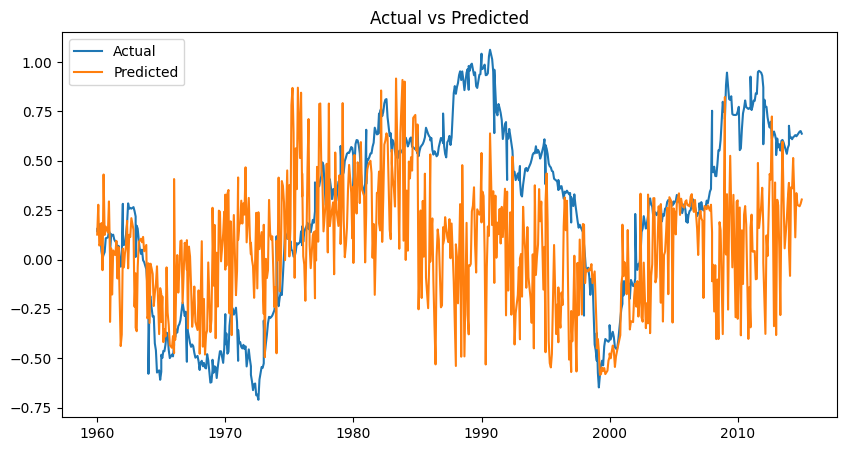

In [294]:
plt.figure(figsize=(10,5))
plt.plot(df_results['Date'], df_results['Actual'], label='Actual')
plt.plot(df_results['Date'], df_results['Predicted'], label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()

In [295]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_results['Actual'], df_results['Predicted'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.23655915301012365


In [297]:
# R2 Score
df_results["MSE"] = ((df_results["Predicted"] - df_results["Actual"])/(df_results["Actual"]) )**2
rmse = df_results["MSE"].mean()**0.5
print(rmse)


3.7910688073883647
